1) Instalamos la librería SHAP (SHapley Additive exPlanations), para calcular la contribución de cada variable de entrada a la predicción de la variable de salida.

In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.3/455.3 kB 769.2 kB/s eta 0:00:0000:0100:01


2) Importamos las librerias básicas para nuestros cálculos: Numpy para arreglos y cálculos, Pandas para trabajo con dataset y Matplotlib para graficar nuestros datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3) Importamos la librería drive para acceder al Google Drive donde tenemos nuestro dataset mam_base.csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4) Creamos un dataframe con el nombre de datos_mam que tomará los datos de nuestro dataset original en csv (mam_final.csv)

In [3]:
datos_mam = pd.read_csv('/content/drive/MyDrive/datasets/mam_base.csv')

#en caso de que no se pueda montar el drive, se puede cargar de manera local
#datos_mam = pd.read_csv('mam_base.csv') # Cargar datos

5) Vemos los datos de nuestro dataframe para tener una primera caracterización de nuestros datos y realizar la limpieza de los mismos, por ejemplo vemos algunos campos vacíos (No Data) además de validar el número de filas y columnas que tenemos.

In [4]:
datos_mam

,subject_no,Altitude,Trek_Team,teamMenor10,trekgroupdicho,trekteamquartiles,altitude,ALTTERCILES,altitudeMayor3500m,male_1,...,ANY_AMS,ams_at_HA,severe_ams_at_HA_Mayor_2000m,subject_no.1,AMS_AT_NEXT_ALTITUDE,subject_no.2,PULSE,SBP,DBP,ams_at_HA.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,3.0,0.0,0.0,1.0,848.0,1.0,0.0,1.0,...,0.0,0.0,NaN,1.0,0.0,1.0,58.0,128.0,89.0,NaN
3,2.0,1.0,3.0,0.0,0.0,1.0,848.0,1.0,0.0,1.0,...,0.0,0.0,NaN,2.0,0.0,2.0,43.0,124.0,102.0,NaN
4,3.0,1.0,3.0,0.0,0.0,1.0,848.0,1.0,0.0,1.0,...,0.0,1.0,NaN,3.0,0.0,3.0,52.0,133.0,99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,80.0,10.0,3.0,0.0,0.0,1.0,5140.0,3.0,1.0,1.0,...,0.0,0.0,NaN,80.0,NaN,80.0,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6) Verificamos el tipo de datos que tenemos en nuestro dataframe, donde validamos que tenemos 45 columnas de datos.

In [5]:
datos_mam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subject_no                    800 non-null    float64
 1   Altitude                      800 non-null    float64
 2   Trek_Team                     800 non-null    float64
 3   teamMenor10                   800 non-null    float64
 4   trekgroupdicho                800 non-null    float64
 5   trekteamquartiles             800 non-null    float64
 6   altitude                      800 non-null    float64
 7   ALTTERCILES                   800 non-null    float64
 8   altitudeMayor3500m            799 non-null    float64
 9   male_1                        799 non-null    float64
 10  HEIGHT                        779 non-null    float64
 11  WEIGHT_kg                     779 non-null    float64
 12  BsobreA                       771 non-null    float64
 13  age  

8) Iniciamos la limpieza de nuestros, elimando 34 columnas que para nuestra investigación no tienen inicialmente una relevancia para predicción de la variable de salida, con cargo a revisar añadir otras columnas del dataset en otro proyecto.

In [6]:
datos_mam = datos_mam.drop(columns=['subject_no'])
datos_mam = datos_mam.drop(columns=['Trek_Team'])
datos_mam = datos_mam.drop(columns=['Altitude'])
datos_mam = datos_mam.drop(columns=['male_1'])
datos_mam = datos_mam.drop(columns=['teamMenor10'])
datos_mam = datos_mam.drop(columns=['trekgroupdicho'])
datos_mam = datos_mam.drop(columns=['trekteamquartiles'])
datos_mam = datos_mam.drop(columns=['ALTTERCILES'])
datos_mam = datos_mam.drop(columns=['altitudeMayor3500m'])
datos_mam = datos_mam.drop(columns=['BsobreA'])
datos_mam = datos_mam.drop(columns=['ethnicity'])
datos_mam = datos_mam.drop(columns=['EthnicityCat'])
datos_mam = datos_mam.drop(columns=['cauc'])
datos_mam = datos_mam.drop(columns=['PFT_TIME'])
datos_mam = datos_mam.drop(columns=['location'])
datos_mam = datos_mam.drop(columns=['diamox'])
datos_mam = datos_mam.drop(columns=['staiMayor39'])
datos_mam = datos_mam.drop(columns=['staiy _2'])
datos_mam = datos_mam.drop(columns=['staiMayor39_2'])
datos_mam = datos_mam.drop(columns=['LLS.1'])
datos_mam = datos_mam.drop(columns=['HEADACHE.1'])
datos_mam = datos_mam.drop(columns=['ams_category'])
datos_mam = datos_mam.drop(columns=['ams_severe'])
datos_mam = datos_mam.drop(columns=['ANY_AMS'])
datos_mam = datos_mam.drop(columns=['ams_at_HA'])
datos_mam = datos_mam.drop(columns=['severe_ams_at_HA_Mayor_2000m'])
datos_mam = datos_mam.drop(columns=['subject_no.1'])
datos_mam = datos_mam.drop(columns=['AMS_AT_NEXT_ALTITUDE'])
datos_mam = datos_mam.drop(columns=['subject_no.2'])
datos_mam = datos_mam.drop(columns=['PULSE'])
datos_mam = datos_mam.drop(columns=['SBP'])
datos_mam = datos_mam.drop(columns=['DBP'])
datos_mam = datos_mam.drop(columns=['ams_at_HA.1'])
datos_mam = datos_mam.drop(columns=['medication'])

9) volvemos a validar las columnas que quedaron en nuestro dataset, que para nuestro caso son 11, teniendo como variable de salida el score AMS_C, score que el médico evalúa de los síntomas de afecciones que muestran los pacientes en la cabeza. Por otro lado vemos que tenemos 5 variables que tienen como tipo de dato object y que tienen que cambiarse al tipo de dato flotante para hacer nuestros cálculos.

In [7]:
datos_mam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   altitude             800 non-null    float64
 1   HEIGHT               779 non-null    float64
 2   WEIGHT_kg            779 non-null    float64
 3   age                  799 non-null    float64
 4   SMOKER_n_0_y_1_ex_2  788 non-null    float64
 5   currentSmokers       790 non-null    float64
 6   heart_rate           783 non-null    object 
 7   SPO2                 782 non-null    object 
 8   LLS                  782 non-null    object 
 9   HEADACHE             782 non-null    object 
 10  STAY1                774 non-null    object 
 11  AMS_C                778 non-null    float64
dtypes: float64(7), object(5)
memory usage: 78.5+ KB


10) Cambiamos el tipo de datos de object a float para las 5 columnas identificadas previamente

In [8]:
datos_mam['heart_rate'] = pd.to_numeric(datos_mam['heart_rate'],errors='coerce')
datos_mam['HEADACHE'] = pd.to_numeric(datos_mam['HEADACHE'],errors='coerce')
datos_mam['LLS'] = pd.to_numeric(datos_mam['LLS'],errors='coerce')
datos_mam['STAY1'] = pd.to_numeric(datos_mam['STAY1'],errors='coerce')
datos_mam['SPO2'] = pd.to_numeric(datos_mam['SPO2'],errors='coerce')

11) Validamos el número de campos vacíos en nuestro dataset por cada columna

In [9]:
datos_mam.isna().sum()

altitude               36
HEIGHT                 57
WEIGHT_kg              57
age                    37
SMOKER_n_0_y_1_ex_2    48
currentSmokers         46
heart_rate             60
SPO2                   59
LLS                    55
HEADACHE               55
STAY1                  64
AMS_C                  58
dtype: int64

12) Eliminamos todas las filas que contengan campos vacíos para que no generen potenciales alteraciones en nuestra predicción

In [10]:
datos_mam = datos_mam.dropna(how='any')
datos_mam

,altitude,HEIGHT,WEIGHT_kg,age,SMOKER_n_0_y_1_ex_2,currentSmokers,heart_rate,SPO2,LLS,HEADACHE,STAY1,AMS_C
2,848.0,174.0,76.0,24.0,0.0,0.0,82.0,97.0,1.0,0.0,29.0,1.0
3,848.0,198.0,90.0,26.0,0.0,0.0,59.0,95.0,0.0,0.0,22.0,0.0
4,848.0,180.0,80.0,26.0,0.0,0.0,82.0,95.0,4.0,1.0,23.0,7.0
5,848.0,178.0,76.0,41.0,2.0,0.0,72.0,97.0,2.0,0.0,25.0,8.0
6,848.0,160.0,50.0,26.0,0.0,0.0,95.0,97.0,1.0,0.0,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,5140.0,175.0,73.0,36.0,0.0,0.0,78.0,82.0,2.0,0.0,58.0,7.0
820,5140.0,183.0,94.0,43.0,0.0,0.0,56.0,83.0,4.0,1.0,20.0,2.0
822,5140.0,191.0,96.0,41.0,0.0,0.0,77.0,84.0,3.0,1.0,25.0,14.0
823,5140.0,180.0,85.0,26.0,0.0,0.0,72.0,83.0,2.0,1.0,30.0,0.0


13) Validamos si tenemos algún campo que tenga escrito "N/A", como inicialmente mostraba nuestro dataset, validamos que no existe ninguno, lo que nos da un dataset limpio para analizar.

In [11]:
conteo_na = (datos_mam == 'N/A').sum()
print(conteo_na)

altitude               0
HEIGHT                 0
WEIGHT_kg              0
age                    0
SMOKER_n_0_y_1_ex_2    0
currentSmokers         0
heart_rate             0
SPO2                   0
LLS                    0
HEADACHE               0
STAY1                  0
AMS_C                  0
dtype: int64


14) Vemos los estadísticos de nuestros datos, para ver los máximos y mínimos valores de cada columna, así como su media, la cantidad de datos y la desviación estandar, para empezar a observar las características de nuestras variables y tener una mejor idea de nuestro modelo. Por ejemplo vemos que el score del AMS_C va desde 0 hasta 45, lo que nos hace presumir que en ese rango se tienen que dar nuestras predicciones, así como la saturación de oxígeno que va desde 60 hasta 100, y que presumiblemente podría ser una variable de entrada importante.

In [12]:
datos_mam.describe()

,altitude,HEIGHT,WEIGHT_kg,age,SMOKER_n_0_y_1_ex_2,currentSmokers,heart_rate,SPO2,LLS,HEADACHE,STAY1,AMS_C
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,2777.242759,172.845517,73.135172,32.075862,0.277241,0.070345,72.424828,91.871724,1.027586,0.224828,28.790345,1.815172
std,1395.831686,8.978542,12.040978,8.209349,0.638622,0.255904,13.244782,6.915939,1.746128,0.417757,9.156266,4.867475
min,848.000000,153.000000,49.000000,19.000000,0.000000,0.000000,40.000000,60.000000,0.000000,0.000000,20.000000,0.000000
25%,1456.000000,166.000000,65.000000,26.000000,0.000000,0.000000,62.000000,88.000000,0.000000,0.000000,21.000000,0.000000
50%,2430.000000,172.000000,74.000000,32.000000,0.000000,0.000000,72.000000,95.000000,0.000000,0.000000,25.000000,0.000000
75%,4072.000000,180.000000,81.000000,36.000000,0.000000,0.000000,81.000000,97.000000,1.000000,0.000000,34.000000,1.000000
max,5140.000000,198.000000,105.000000,56.000000,2.000000,1.000000,116.000000,100.000000,12.000000,1.000000,60.000000,45.000000


15) Validamos nuevamente nuestros datos para después hacer un histograma con ellos y analizarlos a mayor profundidad.

In [13]:
datos_mam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 2 to 824
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   altitude             725 non-null    float64
 1   HEIGHT               725 non-null    float64
 2   WEIGHT_kg            725 non-null    float64
 3   age                  725 non-null    float64
 4   SMOKER_n_0_y_1_ex_2  725 non-null    float64
 5   currentSmokers       725 non-null    float64
 6   heart_rate           725 non-null    float64
 7   SPO2                 725 non-null    float64
 8   LLS                  725 non-null    float64
 9   HEADACHE             725 non-null    float64
 10  STAY1                725 non-null    float64
 11  AMS_C                725 non-null    float64
dtypes: float64(12)
memory usage: 73.6 KB


16) Generamos histogramas de nuestras 12 variables para ver su comportamiento a más detalle, aquí notamos que nuestras variables currentSmoker y HEADACHE son dicotómicas, que corresponde a 0 y 1, y se expresan para fumador o no fumador y dolor de cabeza o no dolor de cabeza.

array([[<AxesSubplot: title={'center': 'altitude'}>,
        <AxesSubplot: title={'center': 'HEIGHT'}>,
        <AxesSubplot: title={'center': 'WEIGHT_kg'}>],
       [<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'SMOKER_n_0_y_1_ex_2'}>,
        <AxesSubplot: title={'center': 'currentSmokers'}>],
       [<AxesSubplot: title={'center': 'heart_rate'}>,
        <AxesSubplot: title={'center': 'SPO2'}>,
        <AxesSubplot: title={'center': 'LLS'}>],
       [<AxesSubplot: title={'center': 'HEADACHE'}>,
        <AxesSubplot: title={'center': 'STAY1'}>,
        <AxesSubplot: title={'center': 'AMS_C'}>]], dtype=object)

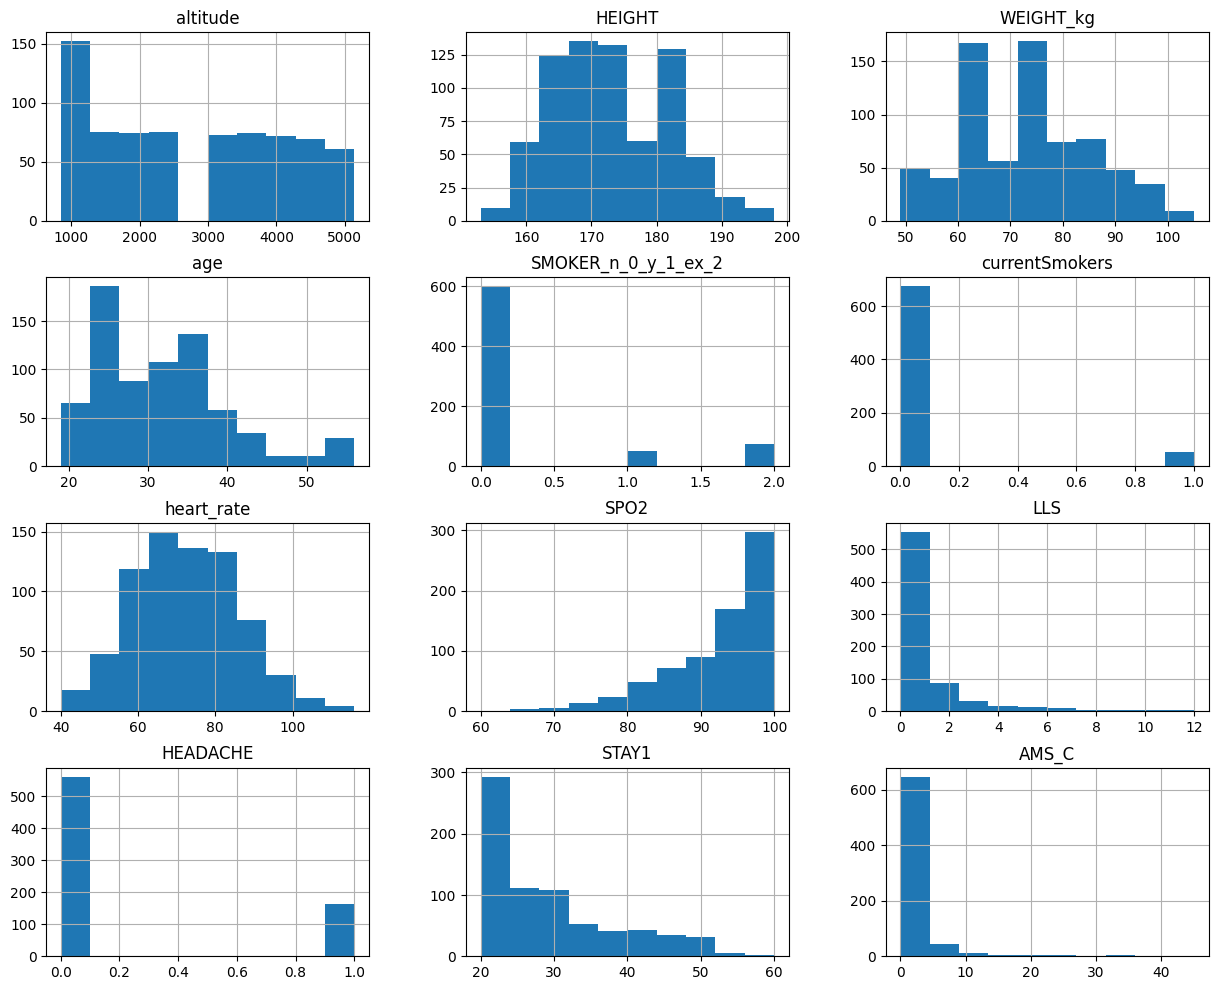

In [14]:
datos_mam.hist(figsize=(15,12))

18) Empezamos a graficar cuadros de correlación de 2 variables para ver el comportamiento inicial de las variables de entrada respuecto a nuestra variable de salida AMS_C, en este primer gráfico de disperción de datos vemos la correlación entre altura y el score del AMS_C, viendo que la mayoría de datos se con un alto score de AMS_C se encuentran a una altura superior a los 5000 msnsm, lo que demuestra una correlación inicial de altura y AMS_C

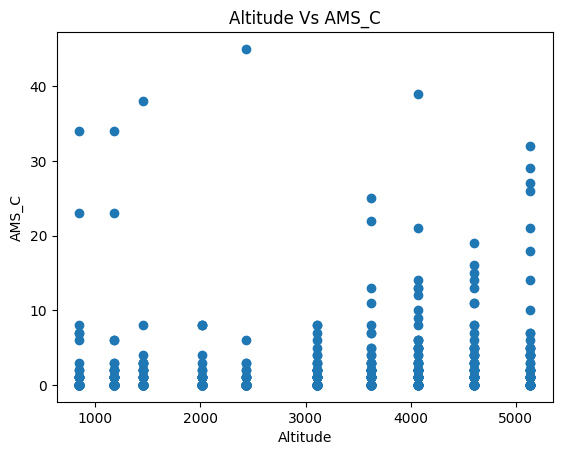

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_mam['altitude'], y=datos_mam['AMS_C'])
plt.title('Altitude Vs AMS_C')
plt.xlabel('Altitude')
plt.ylabel('AMS_C')
plt.show()

20) Para un mejor análisis coloreamos nuestros datos, clasificando en 3 grupos el eje Y, que corresponde al AMS_C score, el primero de 0 a 10 en color verde, de 10 a 30 en color anaranjado y mayores a 30 en color rojo, que son los casos que se tendría que tomar más en cuenta por presentar el Mal Agudo de Montaña en niveles más peligrosos.

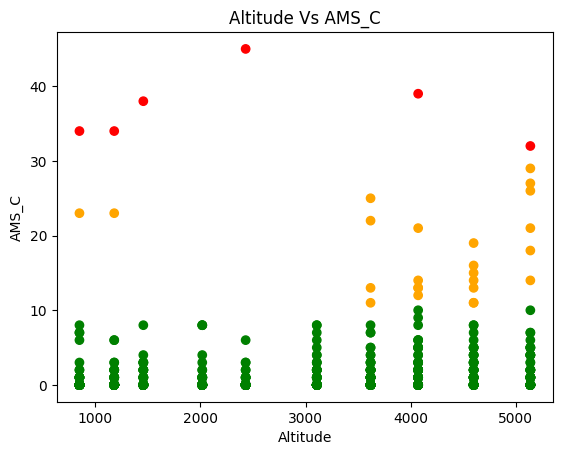

In [16]:
import matplotlib.pyplot as plt

# Definir una función para asignar colores según las condiciones dadas
def color_by_y(value):
    if value <= 10:
        return 'green'
    elif 10 < value <= 30:
        return 'orange'
    else:
        return 'red'

# Aplicar la función para obtener la lista de colores
colors = datos_mam['AMS_C'].apply(color_by_y)

# Crear la gráfica de dispersión con los colores asignados
plt.scatter(x=datos_mam['altitude'], y=datos_mam['AMS_C'], c=colors)
plt.title('Altitude Vs AMS_C')
plt.xlabel('Altitude')
plt.ylabel('AMS_C')
plt.show()

21) Aqui generamos un gráfico de dispersión entre la saturación de oxígeno y el AMS_C, viendo que la mayor cantidad de datos con alto score de AMS_C se dan en personas que están con una saturación menor a 90.

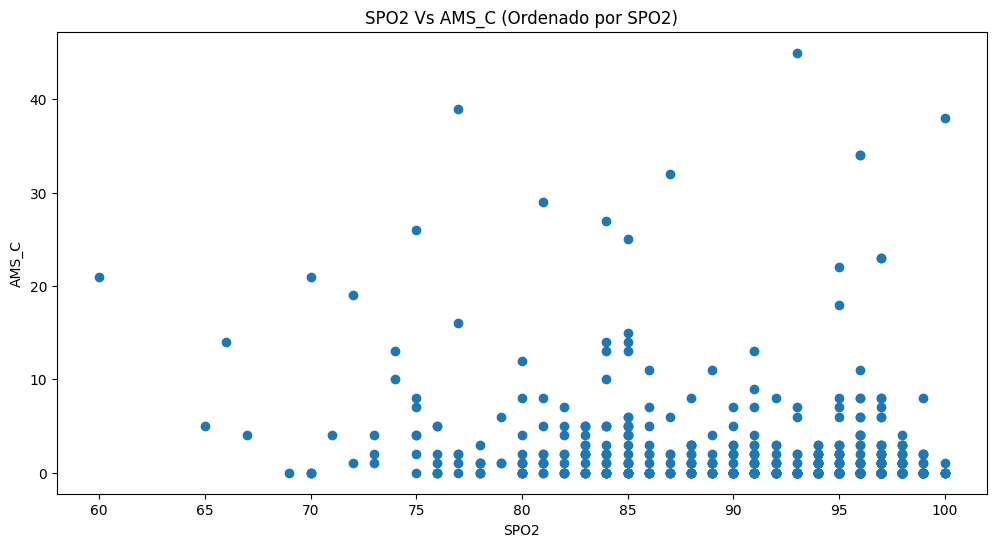

In [17]:
datos_mam = datos_mam.sort_values(by='SPO2', ascending=True)
plt.figure(figsize=(12, 6))
plt.scatter(x=datos_mam['SPO2'], y=datos_mam['AMS_C'])
plt.title('SPO2 Vs AMS_C (Ordenado por SPO2)')
plt.xlabel('SPO2')
plt.ylabel('AMS_C')
plt.show()

22) Generamos el gráfico de dispersión entre la columna STAY1 que corresponde a un score de ansiedad y el AMS_C, viendo que a mayor score de ansiedad, mayor score de AMS_C, presumiendo inicialmente una fuerte correlación entre ambos datos.

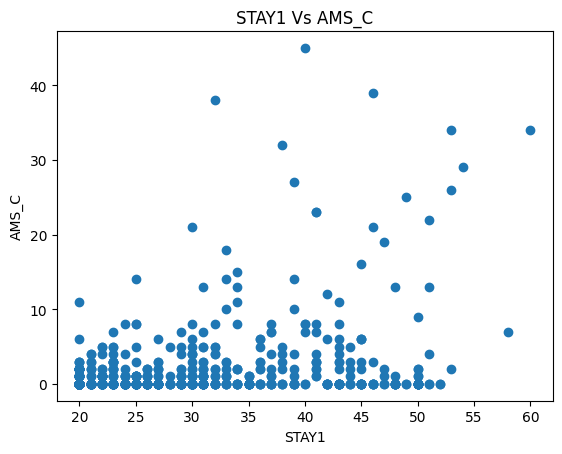

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_mam['STAY1'], y=datos_mam['AMS_C'])
plt.title('STAY1 Vs AMS_C')
plt.xlabel('STAY1')
plt.ylabel('AMS_C')
plt.show()

23) Coloreamos los datos para apreciar mejor los casos rojos y anaranjados, quienes se encuentran cuando la persona tiene un mayor score de Ansiedad, notando mejor la correlación.

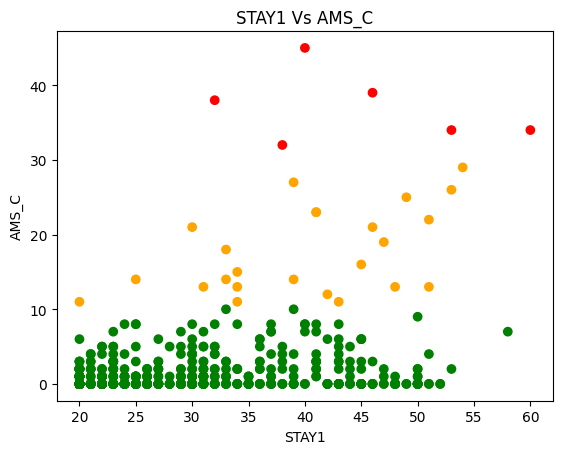

In [19]:
# Definir una función para asignar colores según las condiciones dadas
def color_by_y(value):
    if value <= 10:
        return 'green'
    elif 10 < value <= 30:
        return 'orange'
    else:
        return 'red'

# Aplicar la función para obtener la lista de colores
colors = datos_mam['AMS_C'].apply(color_by_y)

import matplotlib.pyplot as plt
plt.scatter(x = datos_mam['STAY1'], y=datos_mam['AMS_C'], c= colors)
plt.title('STAY1 Vs AMS_C')
plt.xlabel('STAY1')
plt.ylabel('AMS_C')
plt.show()

24) Este gráfico corresponde a la dispersión entre dolor de cabeza y el AMS_C score, notando quienes presentar dolor de cabeza desarrollan un mayor score de AMS_C

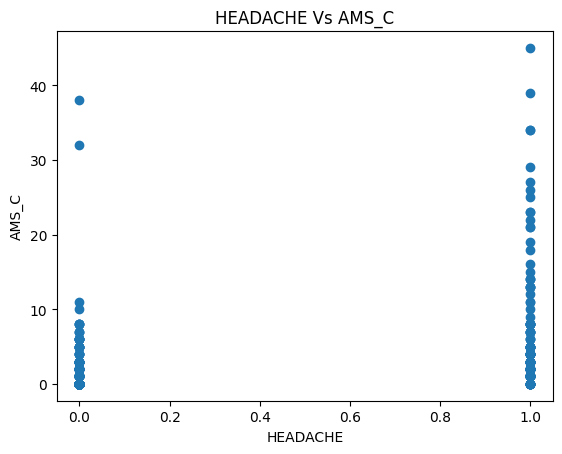

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_mam['HEADACHE'], y=datos_mam['AMS_C'])
plt.title('HEADACHE Vs AMS_C')
plt.xlabel('HEADACHE')
plt.ylabel('AMS_C')
plt.show()

25) Es el mismo gráfico anterior pero con datos coloreados para notar el color rojo y anaranjado

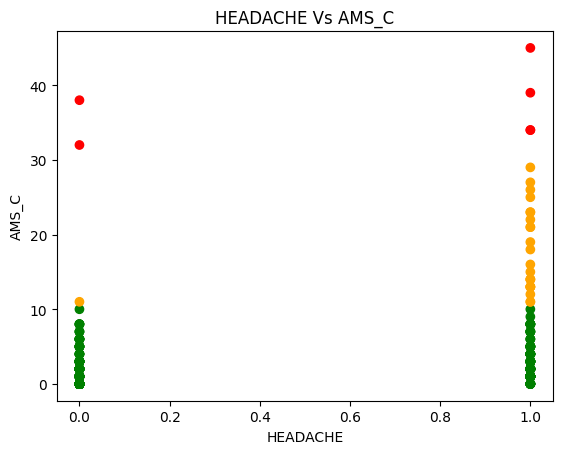

In [21]:
# Definir una función para asignar colores según las condiciones dadas
def color_by_y(value):
    if value <= 10:
        return 'green'
    elif 10 < value <= 30:
        return 'orange'
    else:
        return 'red'

# Aplicar la función para obtener la lista de colores
colors = datos_mam['AMS_C'].apply(color_by_y)

import matplotlib.pyplot as plt
plt.scatter(x = datos_mam['HEADACHE'], y=datos_mam['AMS_C'], c=colors)
plt.title('HEADACHE Vs AMS_C')
plt.xlabel('HEADACHE')
plt.ylabel('AMS_C')
plt.show()

26) Iniciamos con la elección de nuestros modelos de Machine Learning para correlación, como primer paso, asignamos a la variable "X" nuestros datos de entrada y la varible "y" nuestro dato de salida o a predecir, que es el AMS_C

In [22]:

X = datos_mam[['altitude','HEIGHT','WEIGHT_kg','age','SMOKER_n_0_y_1_ex_2','currentSmokers','heart_rate','SPO2','HEADACHE','STAY1','LLS']]
y = datos_mam['AMS_C']

27) Normalizamos los datos de entrada

In [23]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


28) Dividimos los datos en conjuntos de entrenamiento y prueba, con un 80% para entrenamiento.

In [24]:

from sklearn.model_selection import train_test_split, GridSearchCV

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



29) Cargamos las 10 librerias de nuestros 10 modelos de correlación de evaluar

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.kernel_ridge import KernelRidge

30) Definimos nuestros 10 modelos, entre ellos KNN, Redes Neuronales, Random Forest, Regresión Lineal.

In [26]:
#
models = {
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(),
    'XGBoost': XGBRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Kernel Ridge': KernelRidge(),
    'Elastic Net': ElasticNet()
}


31) Definimos los parámetros para la búsqueda de hiperparámetros de cada uno de los 10 modelos.

In [28]:

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Linear Regression': {},  # Linear Regression no tiene hiperparámetros para ajustar
    'Decision Tree': {'max_depth': [3, 5, 7, 9]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Bayesian Ridge': {'n_iter': [100, 300, 500], 'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]},
    'Kernel Ridge': {'alpha': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'Elastic Net': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
}


32) Entrenamos y optimizamos los 10 modelos, este proceso para la cantidad de datos y los 10 modelos pueden durar más de 40 segundos en promedio, en una computadora i7 de 4 GB de RAM.

In [29]:

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

33) Evaluamos los 10 modelos en el conjunto de prueba con los estadísticos R cuadrado, RMSE y MAE.

In [30]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

34) Imprimimos los estadísticos de correlación (R cuadrado) y error (RMSE y MAE) para cada modelo.

In [32]:

for name, metrics in results.items():
    print(f"\nResultados para {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Resultados para KNN:
RMSE: 2.9596
R2: 0.6752
MAE: 1.3330

Resultados para Linear Regression:
RMSE: 2.3648
R2: 0.7926
MAE: 1.3876

Resultados para Decision Tree:
RMSE: 4.3245
R2: 0.3065
MAE: 1.7939

Resultados para Random Forest:
RMSE: 2.9276
R2: 0.6822
MAE: 1.3405

Resultados para SVR:
RMSE: 3.1500
R2: 0.6320
MAE: 1.2900

Resultados para Neural Network:
RMSE: 1.9642
R2: 0.8569
MAE: 1.1999

Resultados para XGBoost:
RMSE: 3.5856
R2: 0.5233
MAE: 1.3909

Resultados para Bayesian Ridge:
RMSE: 2.3825
R2: 0.7895
MAE: 1.3733

Resultados para Kernel Ridge:
RMSE: 3.0154
R2: 0.6628
MAE: 2.1829

Resultados para Elastic Net:
RMSE: 2.3678
R2: 0.7921
MAE: 1.3036


35) Instalamos la librería tabulate para hacer una tabla tabulada con nuestros estadísticos de correlación y error.

In [33]:
!pip install tabulate

36) Generamos una tabla más ordenada para analizar nuestros datos, viendo que las redes neuronales tuvieron el mejor R2, superando el 0.8 y la regresión lineal también obtuvo un buen score de R2 con 0.79, teniendo los menores indicadores para nuestro análisis el modelo XGBoost y árboles de decisión.

In [34]:
from tabulate import tabulate

# Preparar los datos para la tabla
table_data = []
headers = ['Model'] + list(next(iter(results.values())).keys())

for name, metrics in results.items():
    row = [name] + [f"{value:.4f}" for value in metrics.values()]
    table_data.append(row)

# Imprimir la tabla
print("\nResultados de los modelos:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


Resultados de los modelos:
+-------------------+--------+--------+--------+
| Model             |   RMSE |     R2 |    MAE |
+===================+========+========+========+
| KNN               | 2.9596 | 0.6752 | 1.333  |
+-------------------+--------+--------+--------+
| Linear Regression | 2.3648 | 0.7926 | 1.3876 |
+-------------------+--------+--------+--------+
| Decision Tree     | 4.3245 | 0.3065 | 1.7939 |
+-------------------+--------+--------+--------+
| Random Forest     | 2.9276 | 0.6822 | 1.3405 |
+-------------------+--------+--------+--------+
| SVR               | 3.15   | 0.632  | 1.29   |
+-------------------+--------+--------+--------+
| Neural Network    | 1.9642 | 0.8569 | 1.1999 |
+-------------------+--------+--------+--------+
| XGBoost           | 3.5856 | 0.5233 | 1.3909 |
+-------------------+--------+--------+--------+
| Bayesian Ridge    | 2.3825 | 0.7895 | 1.3733 |
+-------------------+--------+--------+--------+
| Kernel Ridge      | 3.0154 | 0.6628 | 2

37) Creamos una gráfica de dispersión para los datos reales y los datos predecidos, notando una importante correlación entre ambos

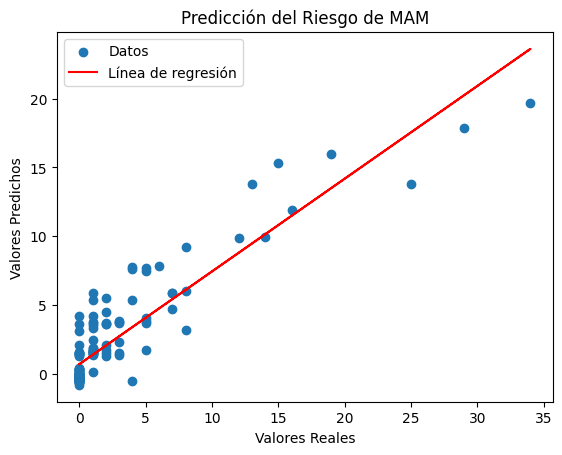

In [35]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred, label='Datos')

# Calcular la línea de regresión
m, b = np.polyfit(y_test, y_pred, 1)  # Ajuste lineal (recta)
plt.plot(y_test, m*y_test + b, color='red', label='Línea de regresión')

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Predicción del Riesgo de MAM")
plt.legend()  # Mostrar leyenda
plt.show()


38) Calculamos los SHAP values para evaluar las principales variables predictoras

In [36]:

import shap

best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = best_models[best_model_name]

# Wrap the model's predict function to make it callable
def model_predict(data):
    return best_model.predict(data)

explainer = shap.Explainer(model_predict, X_train)
shap_values = explainer(X_test)

39) Visualizamos los SHAP values con sus respectivos pesos.

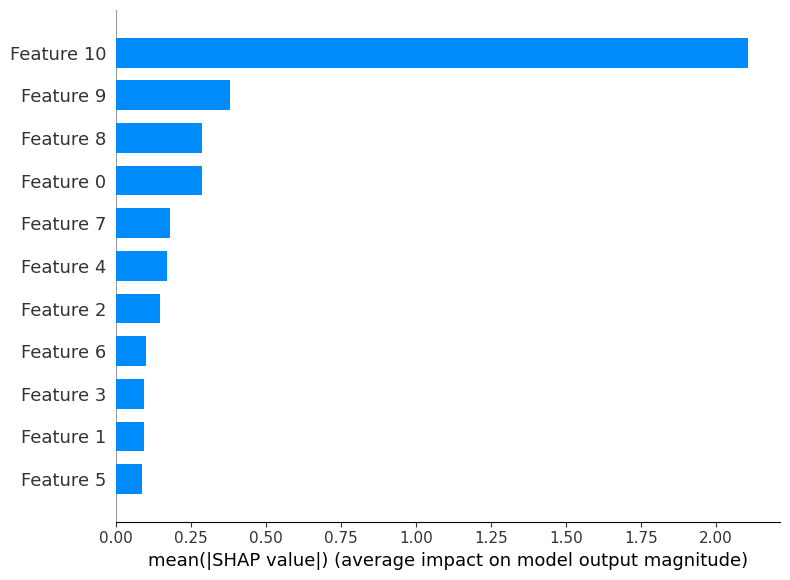

In [37]:

shap.summary_plot(shap_values, X_test, plot_type="bar")



40) Asignamos los nombres de las columnas a los SHAP Values para una mejor comprensión y análisis, aquí confirmamos que las variables LLS, que corresponde a la autoevalución del Mal Agudo de Montaña, la ansiedad, la altura y el dolor de cabeza tienen mayor peso en la predicción de nuetro modelo. Encontrando que una persona con ansiedad puede ser un importante desencadenador del Mal Agudo de Montaña, así como el test del LLS es sumamente importante para la predicción del mal.

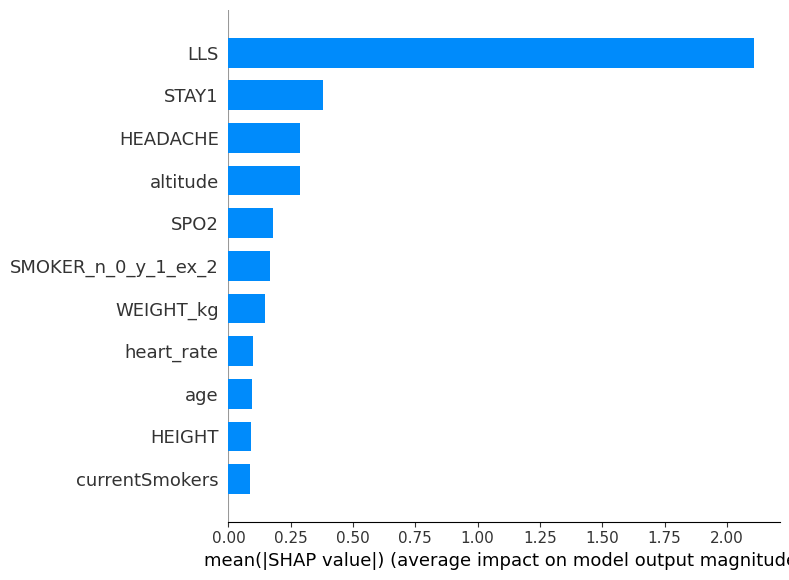

In [38]:
feature_names = X.columns.tolist()

# Crea la figura con un tamaño específico para mejor visualización
plt.figure(figsize=(12, 8))

# Visualiza los SHAP values con los nombres de los datos de entrada
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names, show=False)

# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.show()

42) Creamos una nueva variable para poder predecir con nuevos indicadores para evaluar nuestro modelo.

In [39]:

nueva_persona = pd.DataFrame(np.array([[3300.0, 166.0, 70.0, 23.0, 0.0, 0.0, 90.0, 100.0, 0.0, 20.0, 4.0]]),
                             columns=['altitude','HEIGHT','WEIGHT_kg','age','SMOKER_n_0_y_1_ex_2','currentSmokers','heart_rate','SPO2','HEADACHE','STAY1','LLS'])

nueva_persona_scaled = scaler.transform(nueva_persona)
prediccion = best_model.predict(nueva_persona_scaled)
print(f"\nPredicción para la nueva persona: {prediccion[0]}")


Predicción para la nueva persona: 4.5966780702730246
